In [58]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

# Análise de Keywords

In [59]:
acm = pd.read_csv("acmdl.csv")
ieee = pd.read_csv("ieee.csv", ";", error_bad_lines=False)
elsevier = pd.read_csv("elsevier.csv")
springer = pd.read_csv("newSpringer.csv")

b'Skipping line 141: expected 30 fields, saw 31\nSkipping line 302: expected 30 fields, saw 31\nSkipping line 427: expected 30 fields, saw 31\nSkipping line 448: expected 30 fields, saw 31\nSkipping line 452: expected 30 fields, saw 32\nSkipping line 1041: expected 30 fields, saw 31\nSkipping line 1215: expected 30 fields, saw 33\nSkipping line 1325: expected 30 fields, saw 32\nSkipping line 1447: expected 30 fields, saw 31\nSkipping line 1452: expected 30 fields, saw 31\nSkipping line 1545: expected 30 fields, saw 31\nSkipping line 1916: expected 30 fields, saw 31\nSkipping line 1953: expected 30 fields, saw 31\nSkipping line 1988: expected 30 fields, saw 31\n'


In [60]:
def createSeries(csv):
    dataSeries = pd.Series([])
    x =  0
    for i in csv.keywords:
        x = x + 1
        keywordsFound = str(i).upper().split(",")
        newKeywords = []
        for key in keywordsFound:
            key = key.strip()
            if (key.lower() == "iot" or key.lower() == "internet of things (iot)"
               or key.lower() == "sensor" or key.lower() == "sensors"):
                newKeywords.append("INTERNET OF THINGS")
            elif (key.lower() == "smart city" or key.lower() == "smart cities"):
                newKeywords.append("SMART CITIES")
            elif (key.lower() == "smart home" or key.lower() == "smart homes"):
                newKeywords.append("SMART HOMES")
            elif (key.lower() == "cloud" or key.lower() == "cloud computing"):
                newKeywords.append("CLOUD COMPUTING")
            elif (key.lower() == "context" or key.lower() == "context aware" or
                  key.lower() == "context-aware" or key.lower() == "context-awareness" or
                  key.lower() == "context awareness" or key.lower() == "context aware computing"
                  or key.lower() == "context-aware computing"):
                newKeywords.append("CONTEXT-AWARENESS")
            elif (key.lower() == "mobile" or key.lower() == "mobile computing" or
                  key.lower() == "mobile application" or key.lower() == "mobile sensing" or
                  key.lower() == "smartphone" or key.lower() == "mobile devices" or
                  key.lower() == "smartphones" or key.lower() == "android"):
                newKeywords.append("MOBILE COMPUTING")
            elif (key.lower() == "wearable" or key.lower() == "wearables" or 
                  key.lower() == "wearable device" or key.lower() == "wearable computing"):
                newKeywords.append("WEARABLE")
            elif (key.lower() == "wireless sensor network" or key.lower() == "wireless sensor networks"
                 or key.lower() == "sensor networks"):
                newKeywords.append("WIRELESS SENSOR NETWORKING")
            elif (key.lower() == "hci" or key.lower() == "human-computer interaction"
                 or key.lower() == "human computer interaction"):
                newKeywords.append("HUMAN-COMPUTER INTERACTION")
            elif (key.lower() == "machine learning" or key.lower() == "ai" or key.lower() == "artificial intelligence"):
                newKeywords.append("ARTIFICIAL INTELLIGENCE")
            elif (key != "UBIQUITOUS COMPUTING" and key != "PERVASIVE COMPUTING" and key != "UBIQUITOUS"):
                newKeywords.append(key)
        dataSeries = dataSeries.append(pd.Series(newKeywords),ignore_index=True)
        if (x == 1000):
            break
    return dataSeries

In [61]:
def toFrame(dataSeries):
    data = dataSeries.value_counts().to_frame()
    data = data.drop("NAN")
    print(data.head())
    return data

### Análise ACM

In [62]:
acmDataSeries = createSeries(acm)
acmData = toFrame(acmDataSeries)

                        0
MOBILE COMPUTING      130
WEARABLE               99
ACTIVITY RECOGNITION   60
INTERNET OF THINGS     58
CONTEXT-AWARENESS      40


In [63]:
acmBig = acmData.nlargest(50,0)
acmBig

,0
MOBILE COMPUTING,130
WEARABLE,99
ACTIVITY RECOGNITION,60
INTERNET OF THINGS,58
CONTEXT-AWARENESS,40
ARTIFICIAL INTELLIGENCE,27
HCI,26
URBAN COMPUTING,26
PERSONAL INFORMATICS,25
AUGMENTED REALITY,20


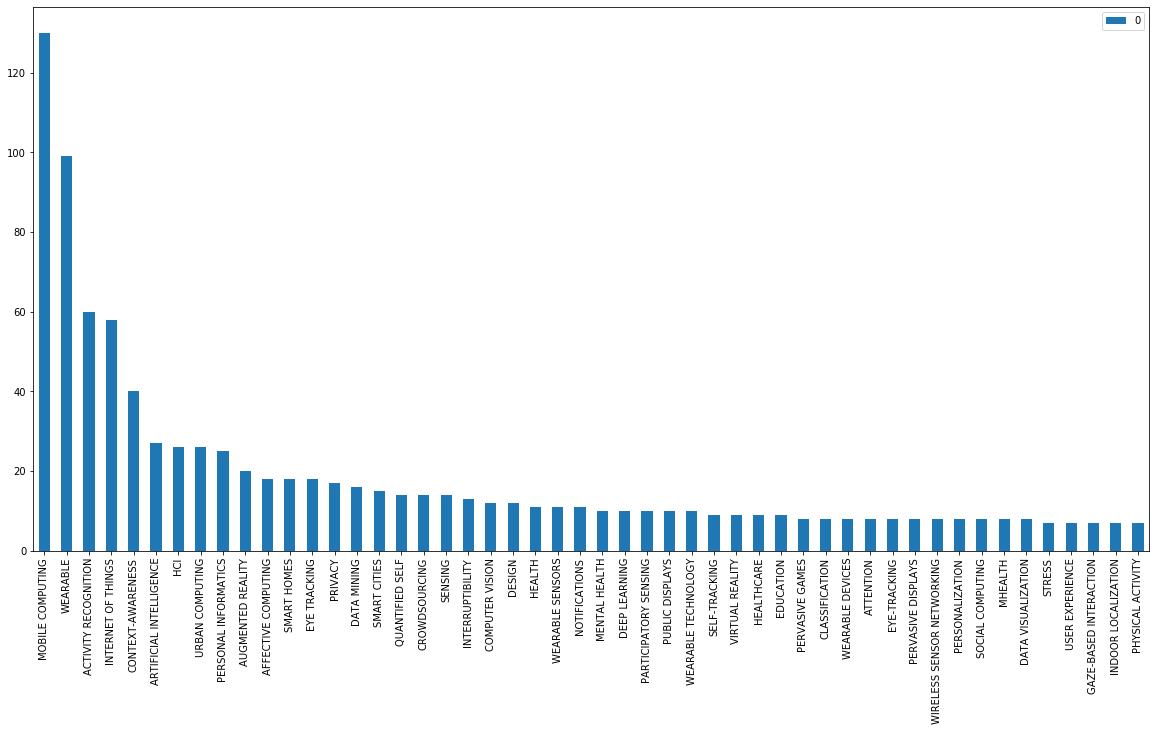

In [64]:
acmBig.plot.bar(figsize=(20,10))

### Análise Elsevier

In [65]:
# Por criação de Series elsevier
elsevierDataSeries = createSeries(elsevier)
elsevierData = toFrame(elsevierDataSeries)

                           0
INTERNET OF THINGS       156
CONTEXT-AWARENESS         68
MOBILE COMPUTING          53
ARTIFICIAL INTELLIGENCE   40
CLOUD COMPUTING           37


In [66]:
elsevierBig = elsevierData.nlargest(50,0)
elsevierBig

,0
INTERNET OF THINGS,156
CONTEXT-AWARENESS,68
MOBILE COMPUTING,53
ARTIFICIAL INTELLIGENCE,40
CLOUD COMPUTING,37
WIRELESS SENSOR NETWORKING,34
SECURITY,31
SMART CITIES,27
ACTIVITY RECOGNITION,26
BIG DATA,17


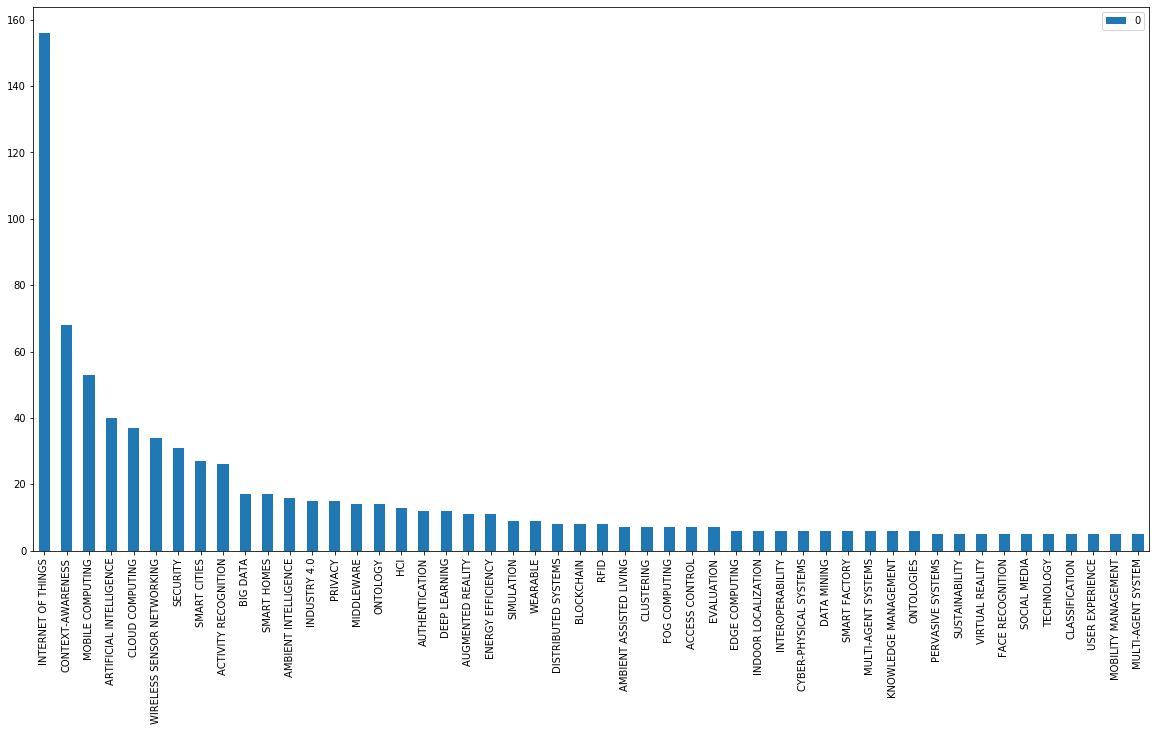

In [67]:
elsevierBig.plot.bar(figsize=(20,10))

### Análise Springer

In [68]:
# Por criação de Series springer
springerDataSeries = createSeries(springer)
springerData = toFrame(springerDataSeries)

                      0
CLOUD COMPUTING     148
INTERNET OF THINGS   96
MOBILE COMPUTING     63
CONTEXT-AWARENESS    50
SMART CITIES         26


In [69]:
springerBig = springerData.nlargest(50,0)
springerBig

,0
CLOUD COMPUTING,148
INTERNET OF THINGS,96
MOBILE COMPUTING,63
CONTEXT-AWARENESS,50
SMART CITIES,26
AMBIENT INTELLIGENCE,21
BIG DATA,19
SECURITY,19
SMART HOMES,18
WEARABLE,18


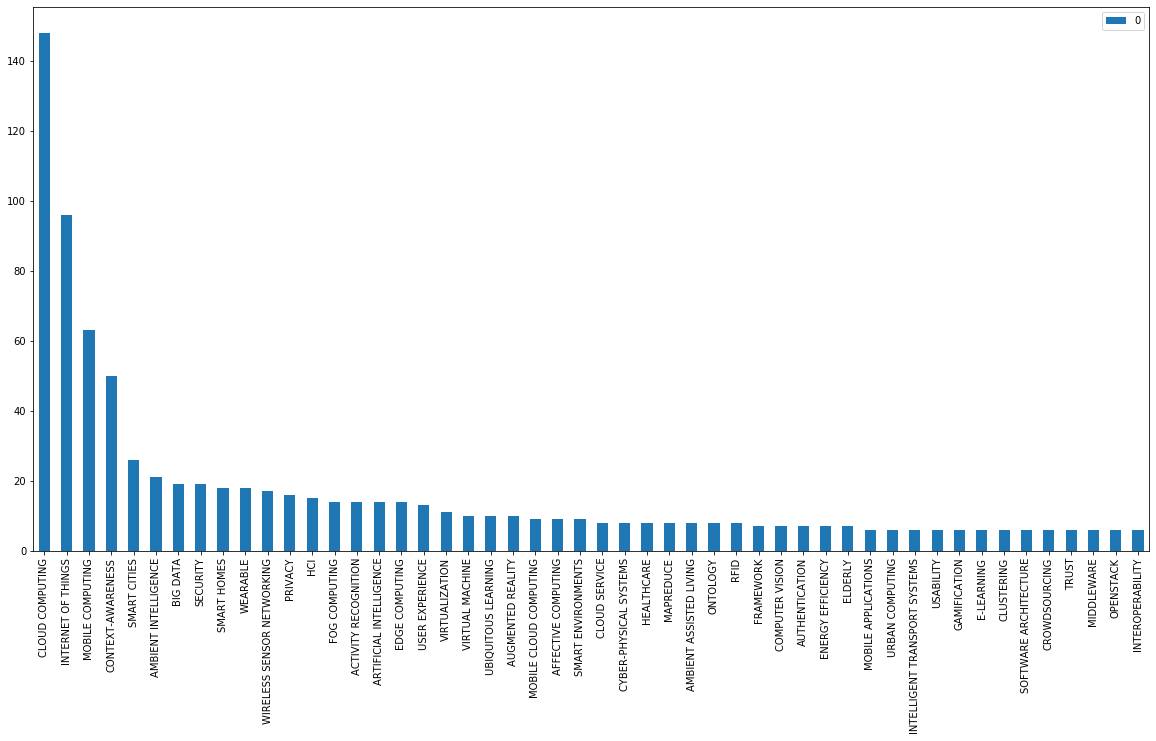

In [70]:
springerBig.plot.bar(figsize=(20,10))

### Análise IEEE

In [71]:
# Por criação de Series ieee
ieeeDataSeries = createSeries(ieee)
ieeeData = toFrame(ieeeDataSeries)

                      0
INTERNET OF THINGS  148
MOBILE COMPUTING    137
CONTEXT-AWARENESS    57
HEALTHCARE           43
SECURITY             33


In [72]:
ieeeBig = ieeeData.nlargest(50,0)
ieeeBig

,0
INTERNET OF THINGS,148
MOBILE COMPUTING,137
CONTEXT-AWARENESS,57
HEALTHCARE,43
SECURITY,33
DATA ANALYSIS,30
ARTIFICIAL INTELLIGENCE,29
HCI,28
PRIVACY,27
CLOUD COMPUTING,24


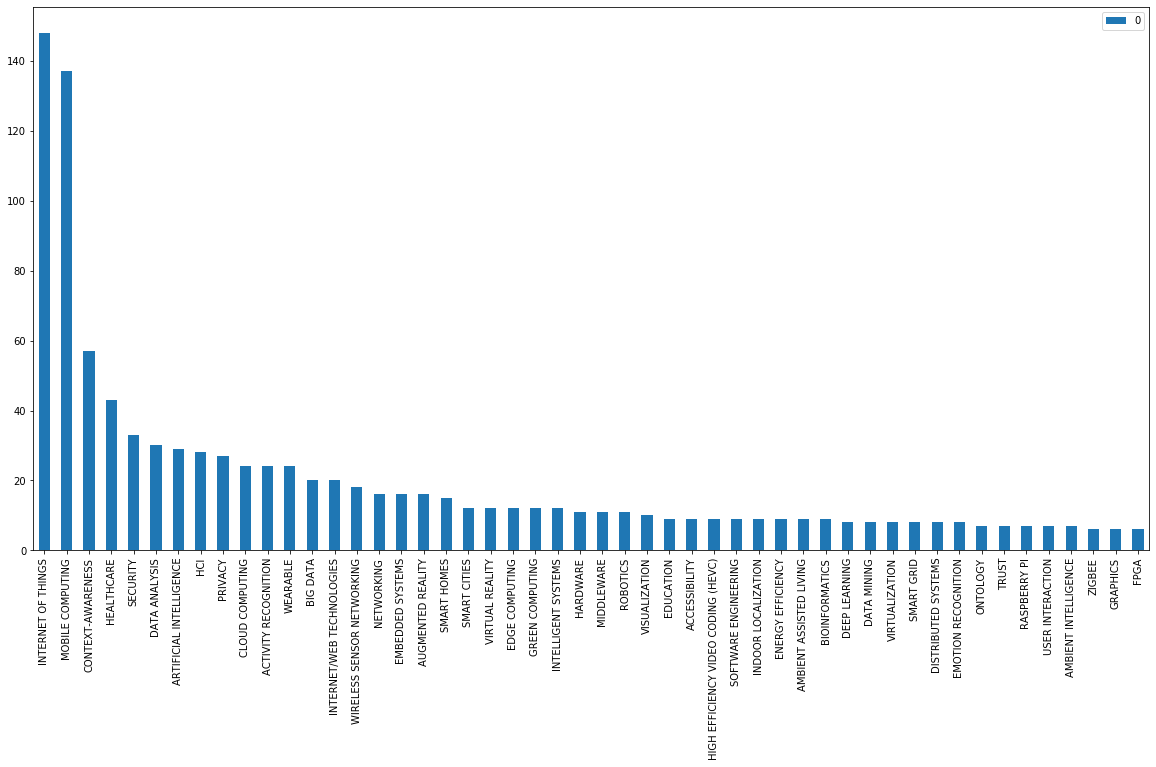

In [73]:
ieeeBig.plot.bar(figsize=(20,10))

### Análise de todas as engines juntas

In [74]:
ieeeAcmDataSeries = ieeeDataSeries.append(acmDataSeries,ignore_index=True)
ieeeAcmSpringerDataSeries = ieeeAcmDataSeries.append(springerDataSeries,ignore_index=True)
ieeeAcmSpringerElsevierDataSeries = ieeeAcmSpringerDataSeries.append(elsevierDataSeries,ignore_index=True)
totalData = toFrame(ieeeAcmSpringerElsevierDataSeries)

                      0
INTERNET OF THINGS  458
MOBILE COMPUTING    383
CLOUD COMPUTING     216
CONTEXT-AWARENESS   215
WEARABLE            150


In [75]:
totalBig = totalData.nlargest(50,0)
totalBig

,0
INTERNET OF THINGS,458
MOBILE COMPUTING,383
CLOUD COMPUTING,216
CONTEXT-AWARENESS,215
WEARABLE,150
ACTIVITY RECOGNITION,124
ARTIFICIAL INTELLIGENCE,110
SECURITY,84
HCI,82
SMART CITIES,80


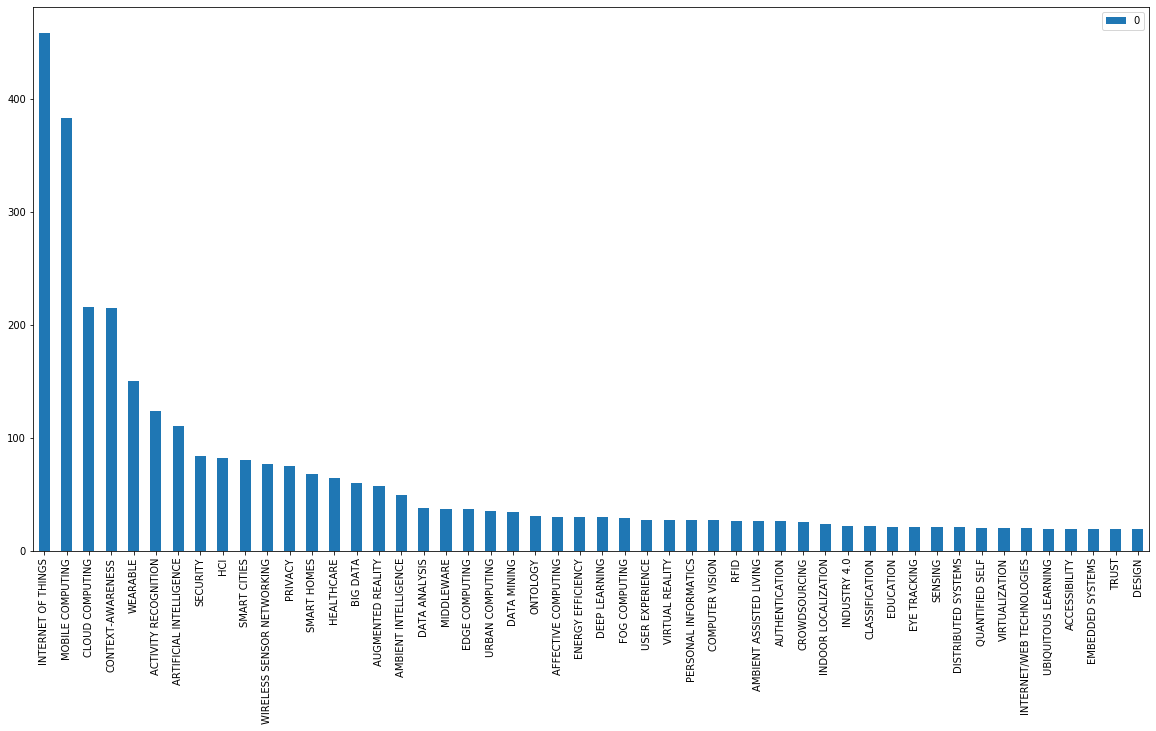

In [77]:
totalBig.plot.bar(figsize=(20,10))

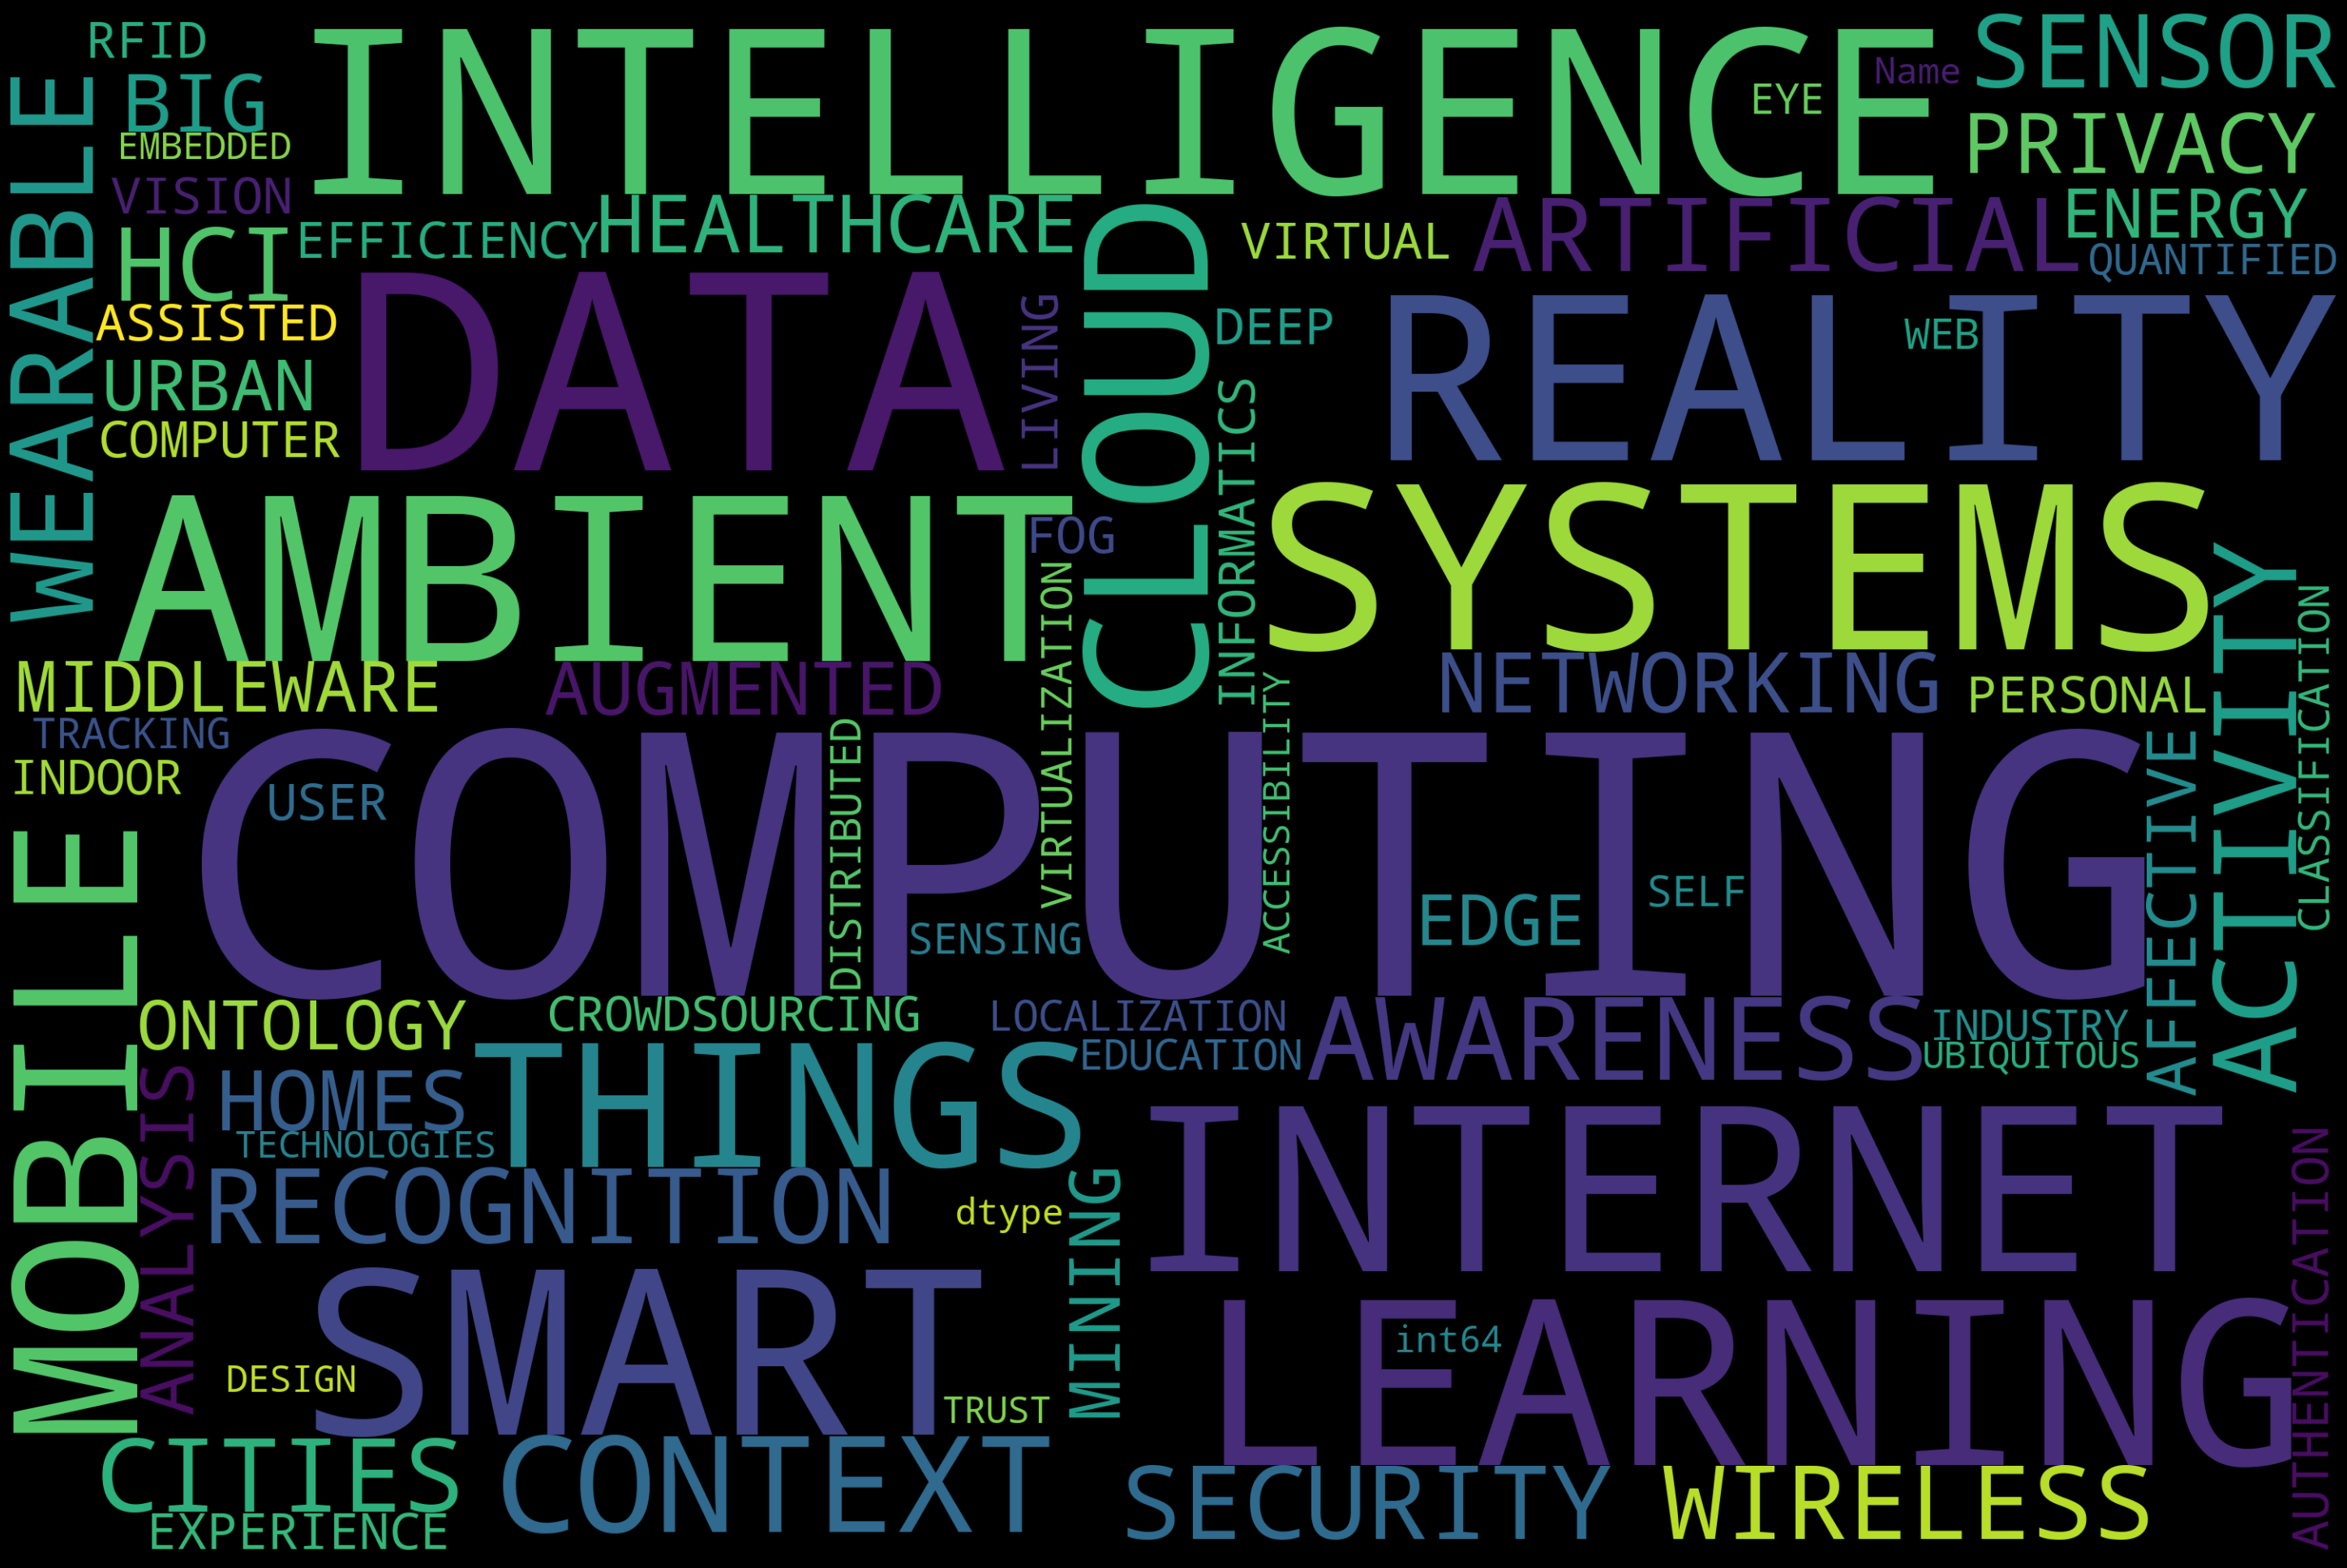

In [91]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = totalBig.iloc[:,0]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [90]:
text = totalBig.iloc[:,0]
text

INTERNET OF THINGS            458
MOBILE COMPUTING              383
CLOUD COMPUTING               216
CONTEXT-AWARENESS             215
WEARABLE                      150
ACTIVITY RECOGNITION          124
ARTIFICIAL INTELLIGENCE       110
SECURITY                       84
HCI                            82
SMART CITIES                   80
WIRELESS SENSOR NETWORKING     77
PRIVACY                        75
SMART HOMES                    68
HEALTHCARE                     64
BIG DATA                       60
AUGMENTED REALITY              57
AMBIENT INTELLIGENCE           49
DATA ANALYSIS                  38
MIDDLEWARE                     37
EDGE COMPUTING                 37
URBAN COMPUTING                35
DATA MINING                    34
ONTOLOGY                       31
AFFECTIVE COMPUTING            30
ENERGY EFFICIENCY              30
DEEP LEARNING                  30
FOG COMPUTING                  29
USER EXPERIENCE                27
VIRTUAL REALITY                27
PERSONAL INFOR